## Hypothesis testing

- During the night the accidents tend to be more severe.
- During the weekend (Friday - Sunday) the number of accidents increases.
- Most dangerous hours to drive
- Worse road condition/type or weather
- Hazards 1 if there are 0 if there are not

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats

plt.style.use('fivethirtyeight')

In [2]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/usr/share/fonts/truetype/ubuntu/Ubuntu-C.ttf',
 '/usr/share/fonts/truetype/ubuntu/Ubuntu-BI.ttf',
 '/usr/share/fonts/truetype/noto/NotoSansKannadaUI-Bold.ttf',
 '/usr/share/fonts/truetype/kacst/KacstDecorative.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/noto/NotoSansLaoUI-Bold.ttf',
 '/usr/share/fonts/truetype/noto/NotoSerifDisplay-Regular.ttf',
 '/usr/share/fonts/opentype/mathjax/MathJax_Math-BoldItalic.otf',
 '/usr/share/fonts/truetype/malayalam/Rachana-Regular.ttf',
 '/usr/share/fonts/truetype/noto/NotoSansOsage-Regular.ttf',
 '/usr/share/fonts/truetype/openoffice/opens___.ttf',
 '/usr/share/fonts/truetype/noto/NotoSansOriya-Bold.ttf',
 '/usr/share/fonts/truetype/kacst/KacstPoster.ttf',
 '/usr/share/fonts/truetype/noto/NotoSerifLao-Bold.ttf',
 '/usr/share/fonts/truetype/noto/NotoSansMalayalam-Bold.ttf',
 '/usr/share/fonts/truetype/noto/NotoSansLimbu-Regular.ttf',
 '/usr/share/fonts/truetype/lohit-kannada/Lohit-Kannada.ttf',
 '

In [35]:
oswfont = {'fontname':'Oswald'}
ssfont = {'fontname':'Source Sans Pro'}

In [2]:
df = pd.read_csv('../data/clean_data.csv', index_col=0)

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [100]:
df.head()

,lon,lat,severity,num_vehicles,num_casualties,date,doy,time,road_type,Speed_limit,ped_crossing,light_cond,weather,road_cond,hazards,urb_or_rur,police_presence,year
0,-0.169101,51.493429,3,2,1,2012-01-19,5,21,Single carriageway,30,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,1,Yes,2012
1,-0.200838,51.517931,3,2,1,2012-04-01,4,17,Single carriageway,30,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,1,Yes,2012
2,-0.188636,51.487618,3,2,1,2012-10-01,3,10,One way street,30,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,1,Yes,2012
3,-0.200259,51.514325,3,1,1,2012-01-18,4,12,Single carriageway,30,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,1,Yes,2012
4,-0.183773,51.497614,3,1,1,2012-01-17,3,20,Single carriageway,30,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,1,Yes,2012


Creating a column that tells if an accident happened during the night (22-6) or during the day (7-21)

In [101]:
df['night'] = np.where((df['time'] >= 7) & (df['time'] <= 22), 0, 1)

Same thing for the weekend days (Fri-Sun).

In [102]:
df['weekend'] = np.where((df.doy == 6) | (df.doy == 7) | (df.doy == 1), 1, 0)

Same thing for accidents that happened during both nights and weekends.

In [103]:
df['night_weekend'] = np.where((df.night == 1) & (df.weekend == 1), 1, 0)

Creating variable with percentages for easier plotting.

In [142]:
perc_fatal_night_weekend = (df[df.night_weekend == 1].groupby(['severity']).count()['lon'][1]\
                           /sum(df[df.night_weekend == 1].groupby(['severity']).count()['lon']))*100

perc_fatal_rest_of_week = (df[df.night_weekend == 0].groupby(['severity']).count()['lon'][1]\
                          /sum(df[df.night_weekend == 0].groupby(['severity']).count()['lon']))*100

### Percentage of fatal accidents over total accidents.

The plot below shows the fraction of fatal accidents over the total accidents that happened in a specific timespan. This means that if an accident happens during a weekend night there's a 3% chance that it's going to be fatal. This chance drops to 1% if the accident happens during the rest of the week.

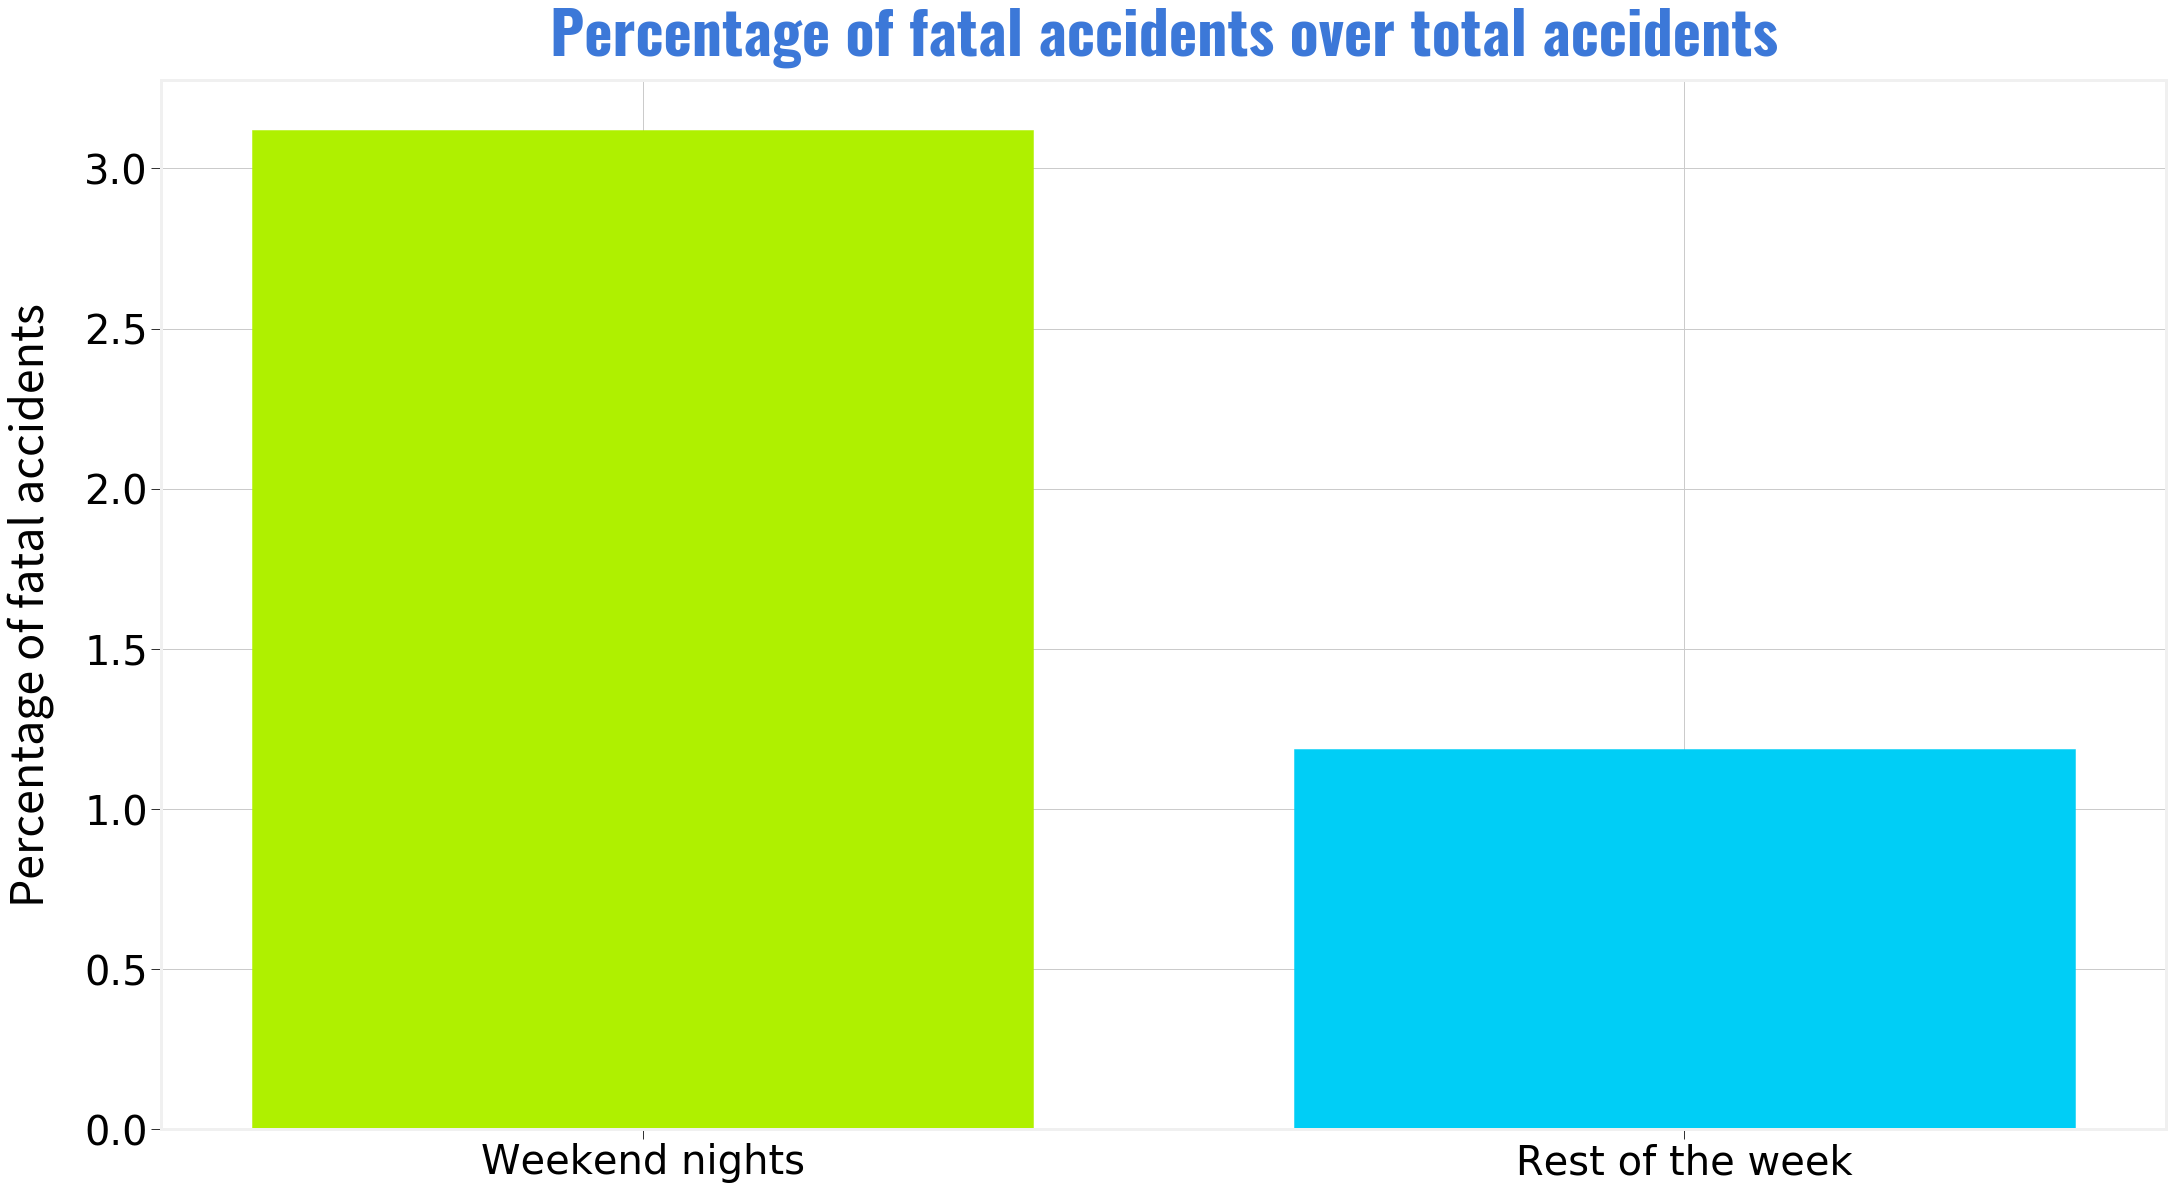

In [193]:
fig, ax = plt.subplots(1, 1, figsize=(32, 18))

ax.bar([0, 0.4], [perc_fatal_night_weekend, perc_fatal_rest_of_week], width=0.3, 
       tick_label=['Weekend nights', 'Rest of the week'])

plt.title('Percentage of fatal accidents over total accidents',
          **oswfont, color='#3c78d8', fontsize=60, y=1.018)
plt.ylabel('Percentage of fatal accidents', size=50, family='Source Sans Pro', labelpad=30)

ax.get_children()[0].set_color('#aff000')    
ax.get_children()[1].set_color('#00cef6') 

ax.tick_params(axis='both', labelsize=40, size=10)
ax.set_facecolor('white')
fig.set_facecolor('white')

plt.savefig('../plots/fatal_weekend_nights.png', facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight')
plt.show()

We can clearly see that accidents that happen during weekend nights are more likely to be fatal compared to accidents that happend during the rest of the week.

### Most dangerous hours to drive

In [33]:
perc_fatal_by_time = (df[df.severity == 1].groupby('time').count()['lon']/df.groupby('time').count()['lon'])*100

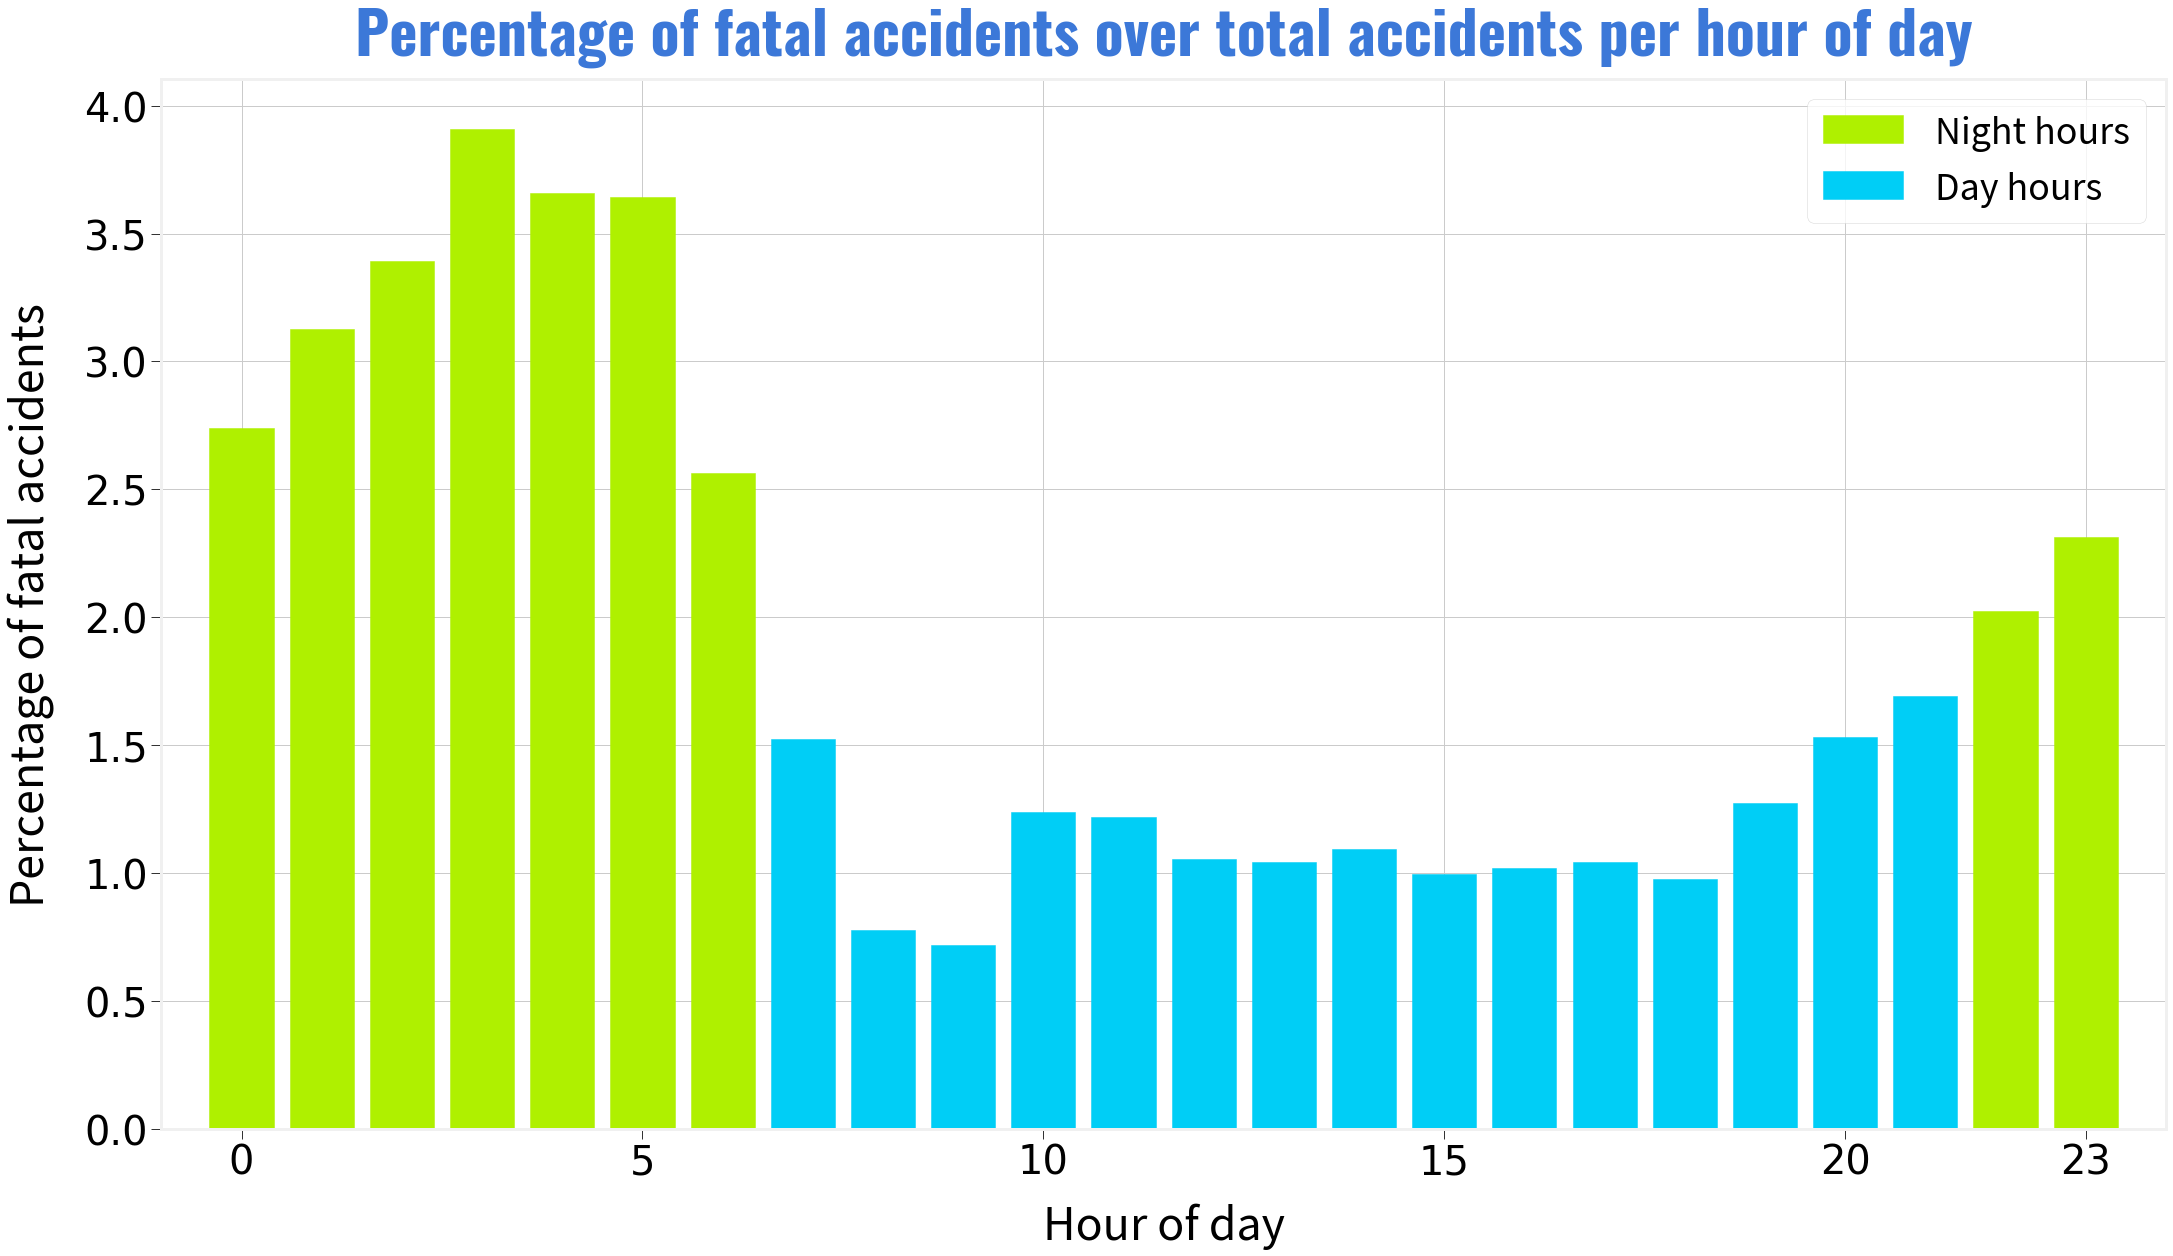

In [194]:
fig, ax = plt.subplots(1, 1, figsize=(32, 18))

ax.bar(sorted(df.time.unique()), perc_fatal_by_time)
ax.set_xlim([-1, 24])
ax.xaxis.set_ticks([0, 5, 10, 15, 20, 23])

plt.title('Percentage of fatal accidents over total accidents per hour of day', **oswfont, color='#3c78d8',
          fontsize=60, y=1.018)
plt.xlabel('Hour of day', size=50, family='Source Sans Pro', labelpad=20)
plt.ylabel('Percentage of fatal accidents', size=50, family='Source Sans Pro', labelpad=30)

for bar in [0, 1, 2, 3, 4, 5, 6, 22, 23]:
    ax.get_children()[bar].set_color('#aff000')    
for bar in range(7, 22):
    ax.get_children()[bar].set_color('#00cef6') 

ax.tick_params(axis='both', labelsize=40, size=10)
ax.set_facecolor('white')
fig.set_facecolor('white')

night_label = mpatches.Patch(color='#aff000', label='Night hours')
day_label = mpatches.Patch(color='#00cef6', label='Day hours')

plt.legend(handles=[night_label, day_label], prop={'size': 40, 'family':'Source Sans Pro'}, facecolor='white', loc='best')

plt.savefig('../plots/fatal_hour_of_day.png', facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight')
plt.show()